# MODEL LOGIKA FUZZY MAMDANI UNTUK OPTIMASI PENGAMBILAN KEPUTUSAN PRIORITAS TUGAS MAHASISWA
**Seminar Nasional Ilmu Terapan (SNITER) UWIKA 2025**
***

### Penulis: David Prastiya Imannuel, Yonatan Widianto
### Institusi: Program Studi Teknik Informatika, UWIKA
### GitHub Codebase: [https://github.com/davidimannuel/uwika-sniter-2025]

# LATAR BELAKANG

### Visi: INDONESIA EMAS 2045 (Talenta Unggul)
* **Tuntutan:** Mahasiswa harus memiliki *soft skill* manajemen waktu yang unggul dan terstruktur.
* **Masalah:** Penentuan prioritas tugas secara manual (metode kaku/biner) seringkali **subjektif** dan gagal mengakomodasi ambiguitas data (*Fuzzy*).
* **Kesenjangan:** Bagaimana sistem AI dapat memodelkan penalaran *nuansa* manusia untuk pengambilan keputusan yang optimal?

# METODE: FUZZY INFERENCE SYSTEM (FIS) MAMDANI
### Logika Fuzzy
* Mengatasi data abu-abu (ambiguitas).
* Output adalah nilai keanggotaan (0 hingga 1).

### Variabel Utama
1.  **Urgensi (U):** Dinamis, dihitung dari waktu tersisa (Normalisasi max 720 jam).
2.  **Kesulitan (K):** Dinormalisasi dari estimasi jam kerja (Max 100 jam).
3.  **Prioritas (P):** Output Crisp Score (0-100).

### Mengapa Mamdani?
1.  **Output yang Dapat Dijelaskan (Linguistik)**
    * Setiap aturan Mamdani menghasilkan kesimpulan dalam bentuk **kata-kata** (Himpunan Fuzzy), misalnya: *Prioritas IS High*.
    * **Keuntungan:** Ini memungkinkan sistem untuk menjawab, *"Prioritas Anda 86.66 karena Urgensi Anda TINGGI."*

2.  **Representasi Penalaran Manusia**
    * Mamdani adalah model Fuzzy yang paling mirip dengan cara otak manusia membuat keputusan yang bernuansa.
    * **Proses:** Anda bisa melihat area output fuzzy digabungkan  yang menunjukkan *titik kompromi* (Centroid) dari semua aturan yang terpicu.

3.  **Kesimpulan:** Kami memilih Mamdani untuk memastikan sistem **"berpikir" secara transparan**, menjadikannya alat bantu yang ideal untuk manajemen waktu (SPK).

# KODE IMPLEMENTASI METODE MAMDANI

In [158]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import dataframe_image as dfi
from IPython.display import Image, display
from io import BytesIO

## SAMPLE DATA

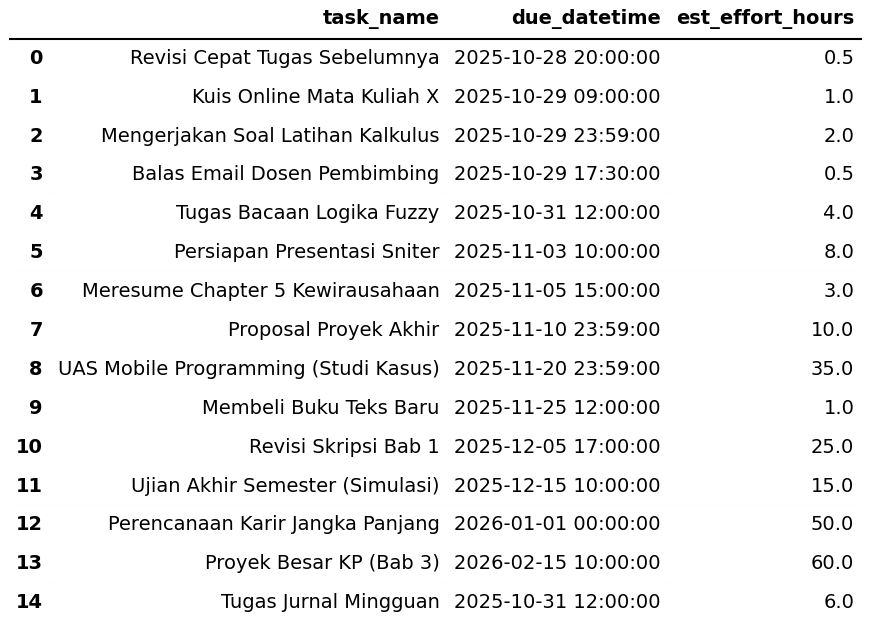

In [166]:
data = pd.read_csv("data.csv")
# data

# Gunakan BytesIO untuk menyimpan gambar di memori
buffer = BytesIO()
dfi.export(data, buffer, table_conversion='browser')
# Tampilkan gambar dari buffer
display(Image(buffer.getvalue()))

In [90]:
# 1. Input: Urgensi (U)
# Rentang waktu: Kami asumsikan 30 hari (720 jam) adalah rentang Urgensi maksimal (0-100).
# Nilai 0 = Tidak Urgen sama sekali (Waktu sisa > 30 hari)
# Nilai 100 = Sangat Urgen (Waktu sisa = 0 jam)
urgency = ctrl.Antecedent(np.arange(0, 101, 1), 'urgency')

# 2. Input: Kesulitan (K)
# Rentang usaha: Kami asumsikan 100 jam adalah usaha maksimal (0-100)
difficulty = ctrl.Antecedent(np.arange(0, 101, 1), 'difficulty')

# 3. Output: Prioritas (P)
priority = ctrl.Consequent(np.arange(0, 101, 1), 'priority')

## Fuzzifikasi: Menentukan Himpunan

/opt/anaconda3/envs/uwika-kecerdasan-buatan/lib/python3.13/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


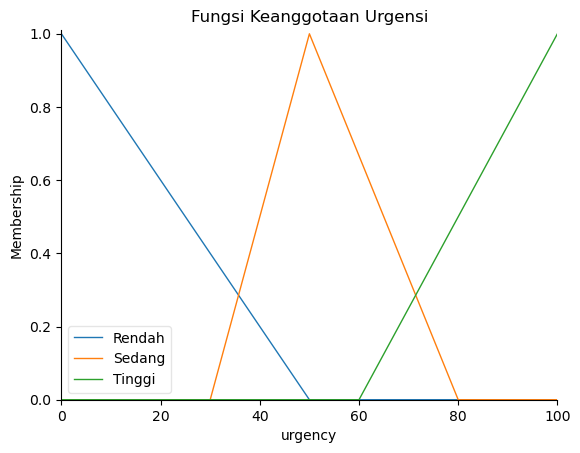

In [91]:
# Urgensi (U): Rendah, Sedang, Tinggi
urgency['Rendah'] = fuzz.trimf(urgency.universe, [0, 0, 50])
urgency['Sedang'] = fuzz.trimf(urgency.universe, [30, 50, 80])
urgency['Tinggi'] = fuzz.trimf(urgency.universe, [60, 100, 100])

# Visualisasi Urgensi 
urgency.view()
plt.title("Fungsi Keanggotaan Urgensi") # Tambahkan judul agar plot lebih jelas
plt.show()

/opt/anaconda3/envs/uwika-kecerdasan-buatan/lib/python3.13/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


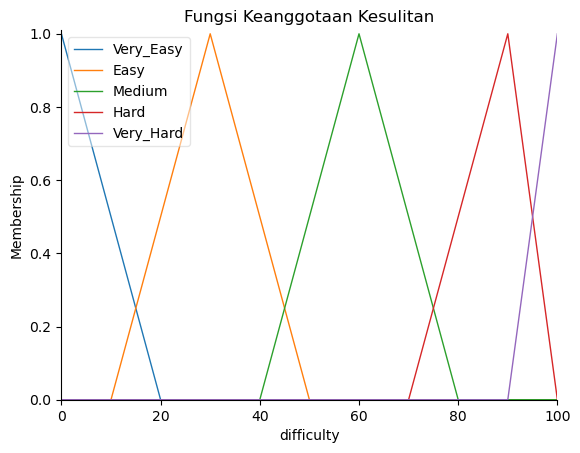

In [92]:
# Kesulitan (K): Very_Easy, Easy, Medium, Hard, Very_Hard
# Batas yang Anda berikan (1, 3, 12, 72 jam) diubah ke skala 0-100.
difficulty['Very_Easy'] = fuzz.trimf(difficulty.universe, [0, 0, 20])  # ~0-20 jam
difficulty['Easy'] = fuzz.trimf(difficulty.universe, [10, 30, 50])    # ~10-50 jam
difficulty['Medium'] = fuzz.trimf(difficulty.universe, [40, 60, 80])   # ~40-80 jam
difficulty['Hard'] = fuzz.trimf(difficulty.universe, [70, 90, 100])   # ~70-100 jam
difficulty['Very_Hard'] = fuzz.trimf(difficulty.universe, [90, 100, 100]) # ~90-100 jam

# Visualisasi Kesulitan 
difficulty.view()
plt.title("Fungsi Keanggotaan Kesulitan") # Tambahkan judul agar plot lebih jelas
plt.show()

/opt/anaconda3/envs/uwika-kecerdasan-buatan/lib/python3.13/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


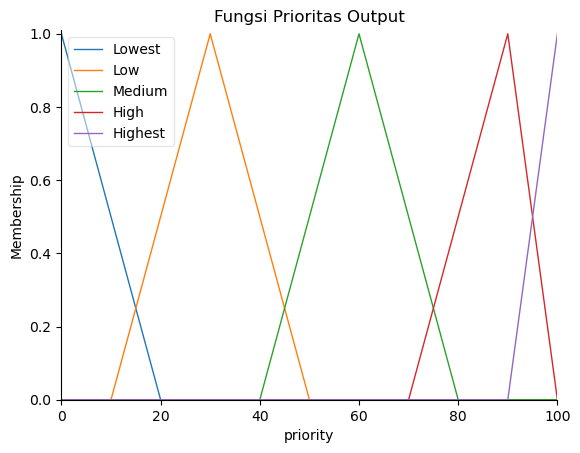

In [93]:
# Prioritas (P): Lowest, Low, Medium, High, Highest
priority['Lowest'] = fuzz.trimf(priority.universe, [0, 0, 20])
priority['Low'] = fuzz.trimf(priority.universe, [10, 30, 50])
priority['Medium'] = fuzz.trimf(priority.universe, [40, 60, 80])
priority['High'] = fuzz.trimf(priority.universe, [70, 90, 100])
priority['Highest'] = fuzz.trimf(priority.universe, [90, 100, 100])

# Visualisasi Prioritas 
priority.view()
plt.title("Fungsi Prioritas Output") # Tambahkan judul agar plot lebih jelas
plt.show()

## Inferensi: Basis Aturan dan Operator Logis

### Basis Aturan (Rule Base)
* Total **15 Aturan** (3 Urgensi x 5 Kesulitan).

| IF Urgensi | AND Kesulitan | THEN Prioritas |
| :--- | :--- | :--- |
| Tinggi | Very Hard | Highest |
| Rendah | Very Easy | Lowest |
| Sedang | Medium | High |

### Proses Inferensi (Mamdani)
1.  **Implikasi (Operator MIN):** Menentukan kekuatan pemicu aturan ($w$) dengan mengambil nilai minimum dari kondisi IF.
2.  **Agregasi (Operator MAX):** Menggabungkan semua output aturan yang terpotong menjadi satu area fuzzy output.

In [94]:
# 3 * 5 = 15 aturan
# Contoh Aturan Kritis
rule1 = ctrl.Rule(urgency['Tinggi'] & difficulty['Very_Hard'], priority['Highest'])
rule2 = ctrl.Rule(urgency['Rendah'] & difficulty['Very_Easy'], priority['Lowest'])
rule3 = ctrl.Rule(urgency['Tinggi'] & difficulty['Very_Easy'], priority['High'])
rule4 = ctrl.Rule(urgency['Rendah'] & difficulty['Very_Hard'], priority['Medium']) # Sulit tapi masih lama, prioritas menengah
rule5 = ctrl.Rule(urgency['Sedang'] & difficulty['Medium'], priority['High'])

# Contoh Aturan Lainnya (10 aturan sisanya)
rule6 = ctrl.Rule(urgency['Sedang'] & difficulty['Easy'], priority['Medium'])
rule7 = ctrl.Rule(urgency['Rendah'] & difficulty['Easy'], priority['Low'])
rule8 = ctrl.Rule(urgency['Tinggi'] & difficulty['Easy'], priority['High'])
rule9 = ctrl.Rule(urgency['Sedang'] & difficulty['Hard'], priority['Highest'])
rule10 = ctrl.Rule(urgency['Rendah'] & difficulty['Hard'], priority['Medium'])
rule11 = ctrl.Rule(urgency['Tinggi'] & difficulty['Medium'], priority['Highest'])
rule12 = ctrl.Rule(urgency['Rendah'] & difficulty['Medium'], priority['Low'])
rule13 = ctrl.Rule(urgency['Sedang'] & difficulty['Very_Easy'], priority['Low'])
rule14 = ctrl.Rule(urgency['Tinggi'] & difficulty['Hard'], priority['Highest'])
rule15 = ctrl.Rule(urgency['Sedang'] & difficulty['Very_Hard'], priority['Highest'])

# Rule1.view() # Anda bisa memvisualisasikan satu aturan

### Kode Implementasi Simulasi

In [95]:
# Gabungkan aturan ke dalam Sistem Kontrol (ControlSystem)
priority_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])

# Buat Simulasi Sistem (ControlSystemSimulation)
priority_sim = ctrl.ControlSystemSimulation(priority_ctrl)

### Function untuk Normalisasi Input dan Proses Fuzzy

#### Urgensi Score (Waktu Tersisa)

* **Tujuan:** Mengkonversi waktu tersisa menjadi skor [0, 100]. Semakin kecil waktu tersisa, semakin tinggi skornya (mendekati 100).
* **Batas Acuan:** Ditetapkan batas maksimal Urgensi pada 30 hari (**720 jam**).
* **Logika Kondisional:**
    1.  Jika waktu tersisa (`time_left_hours`) **<= 0**, skornya **100** (Krisis).
    2.  Jika waktu tersisa **>= 720 jam**, skornya **0** (Tidak Urgen).
* **Formula (Persamaan 3):** Digunakan untuk nilai di antara batas ambang.

$$\text{Urgensi Score} = 100 \times \left(1 - \frac{\text{Jam Tersisa}}{\text{720 Jam}}\right) \quad (3)$$

#### Kesulitan Score (Estimasi Usaha)

* **Tujuan:** Mengkonversi jam kerja estimasi menjadi skor Kesulitan [0, 100].
* **Batas Acuan:** Ditetapkan **Usaha Maksimal** (`max_effort_hours`) sebesar **100 jam**.
* **Logika Kondisional:**
    1.  Jika Jam Usaha $\le 100$ jam, skornya adalah rasio linier.
    2.  Jika Jam Usaha $> 100$ jam, skornya dipotong menjadi **100** (Sangat Sulit).
* **Formula (Persamaan 4):** Digunakan untuk konversi linier.

$$\text{Kesulitan Score} = \left(\frac{\text{Jam Usaha}}{\text{100 Jam}}\right) \times 100 \quad (4)$$

In [96]:
def calculate_fuzzy_priority(task_name, due_datetime_str, est_effort_hours, current_time_str, max_effort_hours=100, max_urgency_days=30):
    
    # --- 1. Perhitungan Input Crisp (Urgensi Dinamis) ---
    
    current_time = datetime.strptime(current_time_str, '%Y-%m-%d %H:%M:%S')
    due_time = datetime.strptime(due_datetime_str, '%Y-%m-%d %H:%M:%S')
    
    time_difference = due_time - current_time
    time_left_hours = time_difference.total_seconds() / 3600
    
    # Normalisasi Urgensi ke skala 0-100
    max_urgency_hours = max_urgency_days * 24
    
    if time_left_hours <= 0:
        crisp_urgency = 100
    elif time_left_hours >= max_urgency_hours:
        crisp_urgency = 0
    else:
        # Semakin kecil time_left_hours, semakin besar crisp_urgency
        # Rumus linear sederhana untuk normalisasi
        crisp_urgency = 100 * (1 - (time_left_hours / max_urgency_hours))
        
    # Normalisasi Kesulitan ke skala 0-100
    crisp_difficulty = (est_effort_hours / max_effort_hours) * 100
    if crisp_difficulty > 100:
        crisp_difficulty = 100
    
    # --- 2. Input ke Sistem Fuzzy ---
    priority_sim.input['urgency'] = crisp_urgency
    priority_sim.input['difficulty'] = crisp_difficulty
    
    # --- 3. Komputasi dan Defuzzifikasi ---
    try:
        priority_sim.compute()
        final_priority_score = priority_sim.output['priority']
    except ValueError as e:
        # Tangani kasus jika input berada di luar universe (walaupun sudah dinormalisasi)
        print(f"Error komputasi untuk tugas {task_name}: {e}")
        final_priority_score = np.nan
        
    return crisp_urgency, crisp_difficulty, final_priority_score

### Hasil Normalisasi Variable

Data berhasil dimuat dari data.csv.

Hasil Prioritas Fuzzy (Waktu Komputasi: 2025-10-28 17:00:00):


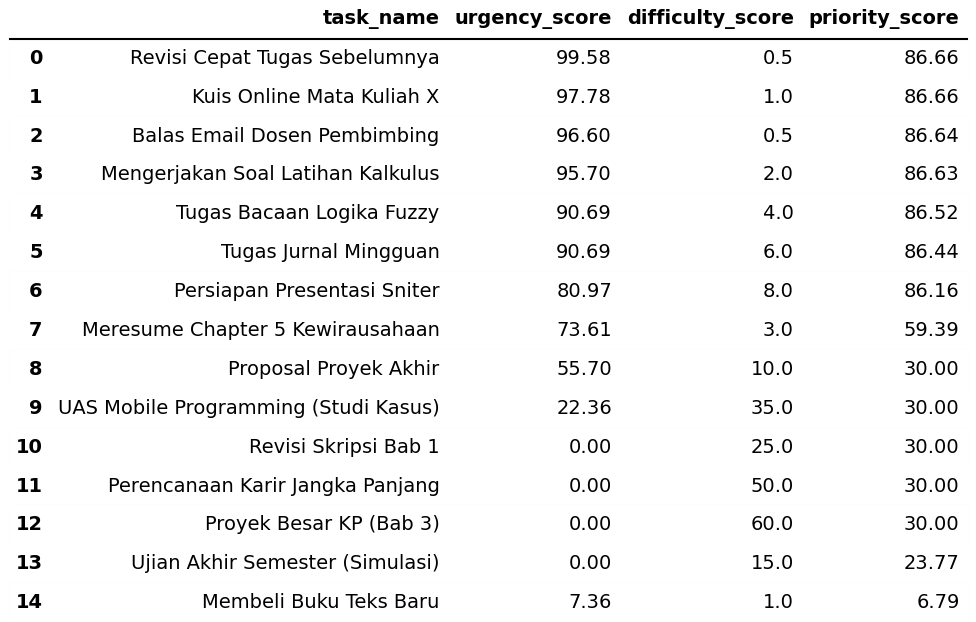

In [168]:
# Step 6: Eksekusi dan Analisis Data (Jupyter)

# TANGGAL DINAMIS (Bisa Anda Ubah!)
# Anda bisa mendapatkan waktu saat ini secara otomatis dengan datetime.now().strftime('%Y-%m-%d %H:%M:%S')
CURRENT_TIME_VAR = '2025-10-28 17:00:00' 

# load data dari CSV
try:
    df = pd.read_csv('data.csv')
    print("Data berhasil dimuat dari data.csv.")
except FileNotFoundError:
    print("ERROR: File 'data.csv' tidak ditemukan. Pastikan file berada di direktori yang sama.")
    # Keluar dari proses jika file tidak ditemukan
    raise
# -----------------------------------------------

# Iterasi dan Hitung
results = []
for index, row in df.iterrows():
    u, d, p = calculate_fuzzy_priority(
        row['task_name'],
        row['due_datetime'],
        row['est_effort_hours'],
        CURRENT_TIME_VAR
    )
    results.append({
        'task_name': row['task_name'],
        'urgency_score': round(u, 2),
        'difficulty_score': round(d, 2),
        'priority_score': round(p, 2)
    })

results_df = pd.DataFrame(results)

# Urutkan berdasarkan Prioritas dan tampilkan
results_df.sort_values(by='priority_score', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)

print(f"\nHasil Prioritas Fuzzy (Waktu Komputasi: {CURRENT_TIME_VAR}):")
# results_df

# Tampilkan gambar dari buffer
buffer = BytesIO()
dfi.export(results_df, buffer, table_conversion='browser')
display(Image(buffer.getvalue()))

### Hasil Simulasi Satu Data


--- Visualisasi Inferensi untuk: Revisi Cepat Tugas Sebelumnya ---
Input: Urgensi=99.58, Kesulitan=0.5


/opt/anaconda3/envs/uwika-kecerdasan-buatan/lib/python3.13/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


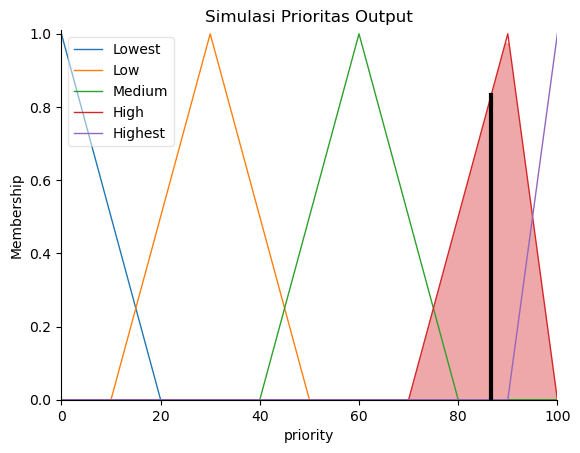

Hasil Akhir (Defuzzifikasi): 86.66


In [98]:
# Contoh Analisis: Tugas 'Revisi Cepat Tugas Sebelumnya'
# Input: Urgensi (sekitar 90-100), Kesulitan (sekitar 1)

# Ambil input dan output dari tugas pertama di hasil (yang paling tinggi prioritasnya)
task_name_to_view = results_df.iloc[0]['task_name']
u_score = results_df.iloc[0]['urgency_score']
d_score = results_df.iloc[0]['difficulty_score']

print(f"\n--- Visualisasi Inferensi untuk: {task_name_to_view} ---")
print(f"Input: Urgensi={u_score}, Kesulitan={d_score}")

priority_sim.input['urgency'] = u_score
priority_sim.input['difficulty'] = d_score
priority_sim.compute()

# Visualisasi Output
priority.view(sim=priority_sim)
plt.title("Simulasi Prioritas Output") # Tambahkan judul agar plot lebih jelas
plt.show()

# Tunjukkan hasil akhir
final_score = priority_sim.output['priority']
print(f"Hasil Akhir (Defuzzifikasi): {round(final_score, 2)}")

### Hasil Simulasi Semua Data

Data berhasil dimuat dari data.csv.

--- TABEL HASIL AKHIR PRIORITAS TUGAS (FUZZY LOGIC) ---


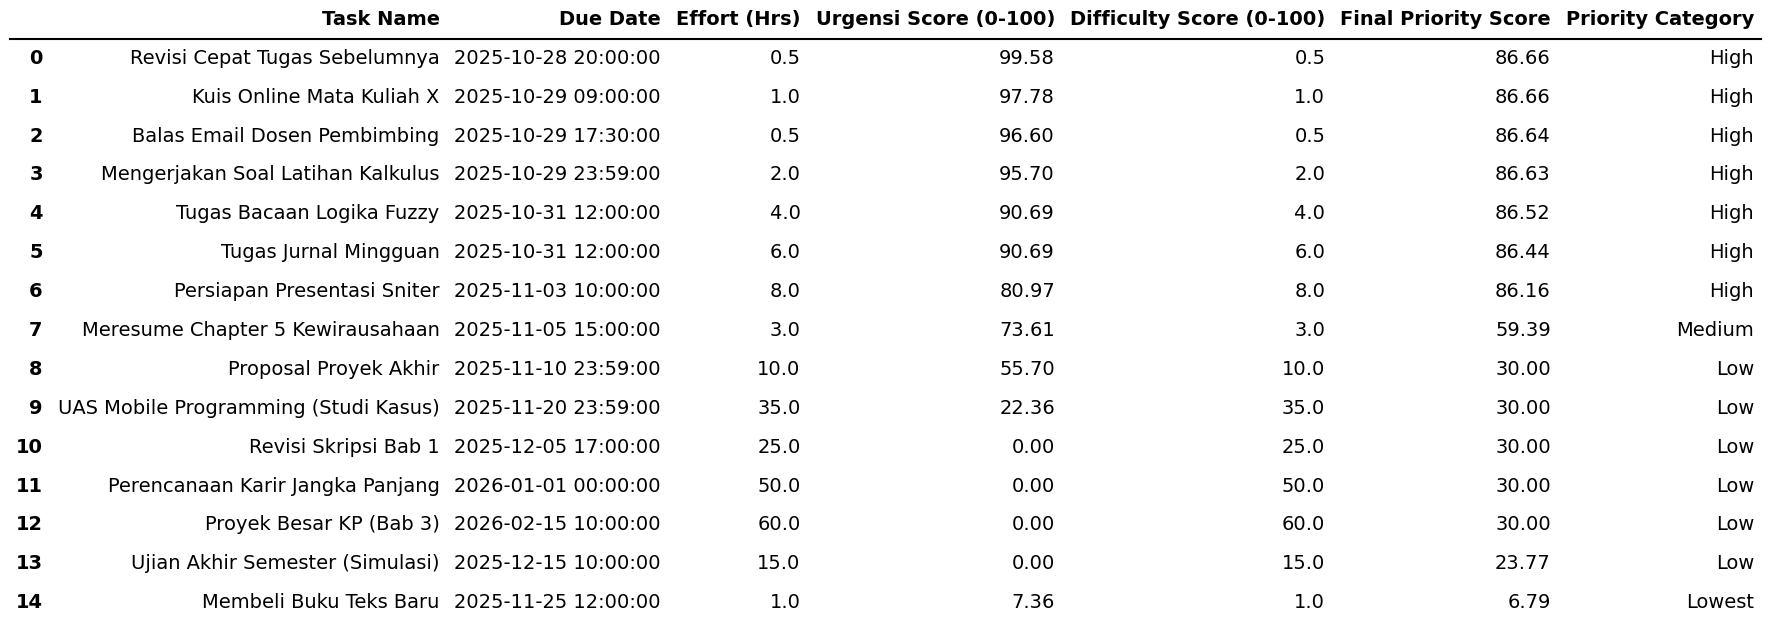

In [169]:
# --- 3. Load Data dan Eksekusi Simulasi ---
try:
    df = pd.read_csv('data.csv')
    print("Data berhasil dimuat dari data.csv.")
except FileNotFoundError:
    print("ERROR: File 'data.csv' tidak ditemukan. Pastikan file berada di direktori yang sama.")
    raise

CURRENT_TIME_VAR = '2025-10-28 17:00:00' 
# Siapkan list untuk menampung hasil
results = []
for index, row in df.iterrows():
    u, d, p = calculate_fuzzy_priority(
        row['task_name'],
        row['due_datetime'],
        row['est_effort_hours'],
        CURRENT_TIME_VAR
    )
    
    # Tentukan kategori Prioritas berdasarkan skor numerik (hanya untuk tampilan)
    if p >= 90: category = 'Highest'   # Di atas 90, sudah pasti masuk kaki MF Highest
    elif p >= 70: category = 'High'     # Di atas 70, mulai dari kaki MF High
    elif p >= 50: category = 'Medium'   # Di atas 50, sudah berada di tengah MF Medium
    elif p >= 20: category = 'Low'      # Di atas 20, sudah melampaui kaki MF Lowest
    else: category = 'Lowest'
    
    results.append({
        'Task Name': row['task_name'],
        'Due Date': row['due_datetime'],
        'Effort (Hrs)': row['est_effort_hours'],
        'Urgensi Score (0-100)': round(u, 2),
        'Difficulty Score (0-100)': round(d, 2),
        'Final Priority Score': round(p, 2),
        'Priority Category': category
    })

results_df = pd.DataFrame(results)

# --- 4. Sortir dan Tampilkan Hasil ---
results_df.sort_values(
    by=['Final Priority Score', 'Urgensi Score (0-100)'], 
    ascending=[False, False], # False untuk descending pada kedua kolom
    inplace=True
)
results_df.reset_index(drop=True, inplace=True)
results_df.reset_index(drop=True, inplace=True)

print("\n--- TABEL HASIL AKHIR PRIORITAS TUGAS (FUZZY LOGIC) ---")
# results_df

# Tampilkan gambar dari buffer
buffer = BytesIO()
dfi.export(results_df, buffer, table_conversion='browser')
display(Image(buffer.getvalue()))